# Day 2 exercises - Creating `plot_bsd`

Exercise 1. Using your function from Exercise 2 on Sheet 1, write a function which computes the **poor man's $L$-function**

$$f_E(x) = \prod_{p \leq x}\frac{N_p(E)}{p}$$

for a given elliptic curve $E/\mathbb{Q}$ and input $x \in \mathbb{R}$.

In [2]:
#auxiliary function which uses all primes
def emodp(E,p):
    return E.Np(p)

#poor mans L function over all primes (including bad reduction):
def pml(E,x):
    prod=1
    for p in Primes():
        if p<=x:
            prod=prod*emodp(E, p)/p
        else:
            return prod
    
    

In [ ]:
    #auxiliary function which only uses primes of good reduction:
    def Emodp(curvedata,prime):
        curve = EllipticCurve(curvedata)
        da = curve.local_data(prime)
        if da.has_bad_reduction():
            return 1
        else: 
            k.<a> = GF(prime)
            E = EllipticCurve(k, curvedata)
            return E.cardinality()
    
    Emodp([0,0,0,-17,1], 3)
    
    #auxiliary function which uses all primes:
    def emodp(E,p):
        curve = EllipticCurve(E)
        return curve.Np(p)
    
    emodp([0,0,0,-17,1], 2)
    
    #poor mans L function over all primes (including bad reduction):
    def poormansLfunction(E,x):
        f=1
        for p in Primes():
            if p<=x:
                f=f*emodp(E, p)/p
            else:
                return f
        return f
    
    poormansLfunction([0,0,0,-17,1],4)
    
    #poor mans L function excluding bad primes:
    def poormansLfunctiononlygood(E,x):
        f=1
        for p in Primes():
            if p<=x:
                f=f*Emodp(E, p)/p
            else:
                return f
        return f
    
    poormansLfunctiononlygood([0,0,0,-17,1],4)
    
    #rounding function:
    def round_up(n, decimals=0):
        multiplier = 10 ** decimals
        return math.ceil(n * multiplier) / multiplier
    
    round_up(poormansLfunctiononlygood([76,123],2000), 5)

In [15]:
%time poormansLfunction([1,2],1000)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.7 ms


428896276725184893395880649866456804416622485017758259110403141935156548917089374615618177159415354956580316581761663870430708952430770043420706927950924758583820399881648842670235546298742447874539562952847536219576989241957798088109392611197208054231011335720452237976441543689925557115831359060371516729613084877182719334809600000000000000000000000000000000000000/162591133581695692212443047521301694012707359591348022712879816298144893795050117486873706348162874013201310929042318523826919570193490767562178037789337635746805731187064469834243502617949728970781685023770775631006694400524702963686918801407555783086549448508446491533486818444035329269480633554880145253902360280774770718096097392974843319516544020624033589869873

Exercise 2. Create a scatter plot of $f_E(x)$ for various elliptic curves $E$. What patterns can you observe? 

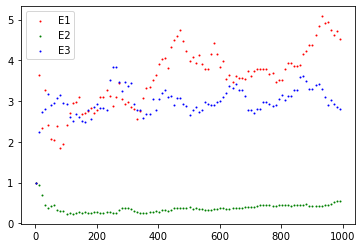

In [10]:
import matplotlib.pyplot as plt

E1 = EllipticCurve([1,2,3,4,5])
E2 = EllipticCurve([3,4,5,6,7])
E3 = EllipticCurve([5,6,7,8,9])

# E elliptic curve, B boundary, lab label
def elliptic_scatter_plot(E, B, step = 10, col = "red", label = "Milan is king, Janne ist auch cool"):
    x = []
    y = []
    for i in range(1,B,step):
        x.append(i)
        y.append(pml(E,i))
        
    plt.scatter(x,y, c = col, s = 1, label = label)  
    
    
elliptic_scatter_plot(E1, 1000, 10, "red", 'E1')
elliptic_scatter_plot(E2, 1000, 10, "green", 'E2')
elliptic_scatter_plot(E3, 1000, 10, "blue", 'E3')

plt.legend(loc = 'upper left')
plt.show()

In [29]:
E=EllipticCurve([76,123])
E.rank()


1

Exercise 3. Create a scatter plot of $\log(f_E(x))$ against $\log\log(x)$ for various elliptic curves $E$. Ensure that the plot includes other helpful user information such as the bound on $x$ used, the Elliptic curves plotted, and possibly suggestive lines of nearest fit.

In [1]:
# plotting a single elliptic curve
def elliptic_log_plot(E, B, step = 10, col = "red", label = "label"):
    x = []
    y = []
    for i in range(1,B,step):
        x.append(ln(ln(i)))
        y.append(ln(pml(E,i)))
    plt.scatter(x,y, c = col, s = 1, label = label)
                    
#elliptic_log_plot(E1, 1000, 10, "red", 'E1')
#elliptic_log_plot(E2, 1000, 10, "green", 'E1')
#elliptic_log_plot(E3, 1000, 10, "blue", 'E1')
                                  
#plt.legend(loc = 'upper left')
#plt.xscale("linear")
#plt.yscale("linear")
#plt.figure(figsize=(20,20))
#plt.show


def plot_bsd(ecs_list, col_list, B = 1000):
    """This plots the poor man's L-function for the elliptic curves in ec_list
    up to the bound B

    Args:
    ecs_list ([EllipticCurve]): List of EllipticCurve objects, all defined
                                    over Q.
    col_list (string): list of colors for plotting.
    B (int, optional): The bound on primes to take. Defaults to 1000.
    """
    for E in ecs_list:
        elliptic_log_plot(E, B, 10, col_list[ecs_list.index(E)%5], str(E.ainvs())+ ", rank: " + str(E.rank()))
    plt.legend(loc = 'upper left')
    plt.xscale("linear")
    plt.yscale("linear")
    plt.figure(figsize=(40,40))
    plt.show

    
E_list = [E1,E2,E3]
colour = ["red", "blue", "green", "yellow", "purple"]
plot_bsd(E_list, colour, B=20000)

NameError: name 'E1' is not defined

Exercise 4. Create a `plot_bsd` function which works for a list of elliptic curves over an arbitrary number field.

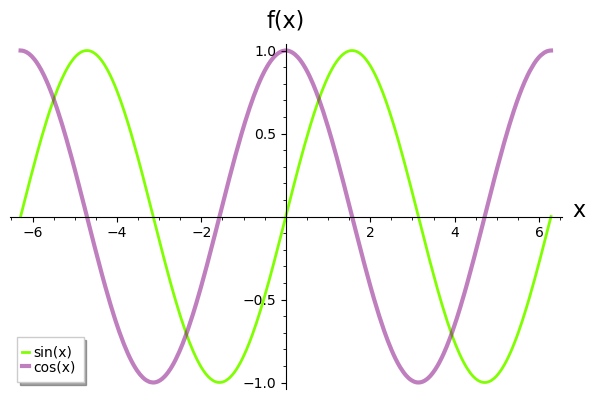

Exercise 5. Can you find an elliptic curve $E/\mathbb{Q}$, and four number fields $K_1, K_2, K_3, K_4$ for which the rank of $E(K_i)$ is different for each $i$. Create the BSD plot for these base-changed curves.

Exercise 6. Why is the **poor man's analytic rank** (the slope of $\log(f_E(x))$ against $\log\log(x)$) equal to the actual analytic rank (order of vanishing at $s=1$ of $L(E/\mathbb{Q},s))?

In [11]:
x = var('x')
K = NumberField(x**2 + x + 1,'a')
L = K.zeta_function(algorithm='gp')
f = (x^2 - 1)/(x - 1)
L(3)
limit((x-1)*L(x), x=1)

TypeError: Cannot evaluate symbolic expression to a numeric value.

In [3]:
def RZP(x,B):
    f=1
    for p in prime_range(1,B):
        f=f*1/(1-p^(-x)) 
    return f
RZP(5, 300)

#def RZeta(x):
#    return limit(RZP(x,B), B=1000)

limit(RZP(x,B), B=2)

#RZeta(5)

NameError: name 'B' is not defined

In [28]:
f(x)=RR(zeta(x))
f(42)
#limit((x-1)*f(x), x=1)

TypeError: Cannot evaluate symbolic expression to a numeric value.

In [20]:
#integrate(zeta(2*x), x, 0, 1)
zeta(44)

5060594468963822588186/37913679547025773526706908457776679169921875*pi^44

In [7]:
test = zeta(43)

In [9]:
RR(test)

1.00000000000011

In [10]:
type(test)

<class 'sage.symbolic.expression.Expression'>

In [11]:
type(zeta(44))

<class 'sage.symbolic.expression.Expression'>

In [57]:
K.<a> = QuadraticField(2)
Z = K.zeta_function()
Z
Z(3.4)
def quick_res(f,eps):
    return eps * f(1+eps)

EPS = 1E-10
cnf_lhs = quick_res(Z,EPS)
K.real_embeddings()
phi1,phi2 = K.real_embeddings()
U = K.unit_group()
U.fundamental_units()
eps1 = U.fundamental_units()[0]
phi1(eps1)
reg_1 = log(phi1(eps1).abs()).abs()
reg_2 = log(phi2(eps1).abs()).abs()
reg_1-reg_2
K.regulator()
R_K = reg_1
R_K
h_K = K.class_number()
h_K
r_1 = len(K.real_embeddings())
r_1
d = K.degree()
r_2 = (d - r_1) / 2
r_2
unit_tors = K.zeta_order()
unit_tors
d_K = K.discriminant()
cnf_rhs = ( 2 ** r_1 * (2 * RR(pi))**r_2 * h_K * R_K) / (unit_tors * sqrt(d_K.abs()))
cnf_rhs
RR(cnf_lhs - cnf_rhs)
[log(phi(eps1).abs()).abs() for phi in K.real_embeddings()]
matrix([[1,2],[3,4],[5,6]])

[0.881373587019543, 0.881373587019543]

In [58]:
K.<a> = NumberField(x^3-2)
real_embed = K.real_embeddings()
all_embed = K.embeddings(CC)
nonreal_embed = [emb for emb in K.complex_embeddings() if not emb(a).is_real()]
nonreal_embed


[Ring morphism:
   From: Number Field in a with defining polynomial x^3 - 2
   To:   Complex Field with 53 bits of precision
   Defn: a |--> -0.629960524947437 - 1.09112363597172*I,
 Ring morphism:
   From: Number Field in a with defining polynomial x^3 - 2
   To:   Complex Field with 53 bits of precision
   Defn: a |--> -0.629960524947437 + 1.09112363597172*I]